In [2]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import spacy
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [5]:
engine = create_engine('sqlite:///sms.sqlite3')
query = 'SELECT text, label FROM classifier_message'
sms = pd.read_sql(query, engine)
engine.dispose()
sms

,text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [15]:
from wordcloud import WordCloud

In [37]:
def create_cloud(label: int):
    assert label in (0, 1)
    words = ' '.join(sms[sms['label'] == label]['text'])
    cloud = WordCloud(background_color="white").generate(words)
    file_name = f"images_analysis/cloud_{'ham' if label == 0 else 'spam'}.png"
    print(f"Saving {file_name}")
    cloud.to_file(file_name)
    return cloud

cloud_ham = create_cloud(0)
cloud_spam = create_cloud(1)

Saving images_analysis/cloud_ham.png
Saving images_analysis/cloud_spam.png


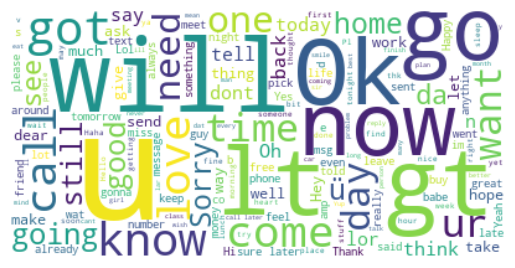

In [33]:
plt.imshow(cloud_ham, interpolation='bilinear')
plt.axis('off')
plt.show()

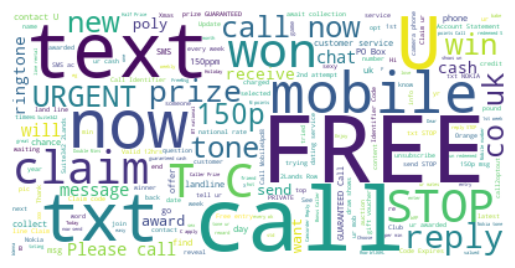

In [34]:
plt.imshow(cloud_spam, interpolation='bilinear')
plt.axis('off')
plt.show()

## Basic features

In [7]:
sms['total_characters'] = sms['text'].str.len()
sms['total_words'] = sms['text'].apply(lambda x: len(x.split()))
sms['mean_word_length'] = sms['text'].apply(lambda x: np.mean([len(w) for w in x.split()]))
sms

,text,label,total_characters,total_words,mean_word_length
0,"Go until jurong point, crazy.. Available only ...",0,111,20,4.600000
1,Ok lar... Joking wif u oni...,0,29,6,4.000000
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,4.571429
3,U dun say so early hor... U c already then say...,0,49,11,3.545455
4,"Nah I don't think he goes to usf, he lives aro...",0,61,13,3.769231
...,...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,160,30,4.366667
5570,Will ü b going to esplanade fr home?,0,36,8,3.625000
5571,"Pity, * was in mood for that. So...any other s...",0,57,10,4.800000
5572,The guy did some bitching but I acted like i'd...,0,125,26,3.846154


In [8]:
sms.groupby('label')[['total_characters', 'total_words', 'mean_word_length']].mean()

,total_characters,total_words,mean_word_length
label,,,
0,71.438160,14.304123,4.169634
1,138.634538,23.911647,4.968991


Spam messages have more words which are longer and use use many different characters.

## Part of speech

In [9]:
nlp = spacy.load('en_core_web_sm')
sms['doc'] = sms['text'].apply(lambda x: nlp(x))

In [11]:
sms['pos'] = sms['doc'].apply(lambda x: [token.pos_ for token in x])
sms['total_nouns'] = sms['pos'].apply(lambda x: x.count('NOUN'))
sms['total_proper_nouns'] = sms['pos'].apply(lambda x: x.count('PROPN'))
sms['total_verbs'] = sms['pos'].apply(lambda x: x.count('VERB'))
sms

,text,label,total_characters,total_words,mean_word_length,doc,pos,total_nouns,total_proper_nouns,total_verbs
0,"Go until jurong point, crazy.. Available only ...",0,111,20,4.600000,"(Go, until, jurong, point, ,, crazy, .., Avail...","[VERB, ADP, PROPN, PROPN, PUNCT, ADJ, PUNCT, A...",3,6,2
1,Ok lar... Joking wif u oni...,0,29,6,4.000000,"(Ok, lar, ..., Joking, wif, u, oni, ...)","[ADJ, NOUN, PUNCT, VERB, NOUN, PROPN, VERB, PU...",2,1,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,4.571429,"(Free, entry, in, 2, a, wkly, comp, to, win, F...","[ADJ, NOUN, ADP, NUM, DET, ADJ, NOUN, PART, VE...",5,7,4
3,U dun say so early hor... U c already then say...,0,49,11,3.545455,"(U, dun, say, so, early, hor, ..., U, c, alrea...","[PROPN, NOUN, VERB, ADV, ADJ, NOUN, PUNCT, PRO...",3,2,2
4,"Nah I don't think he goes to usf, he lives aro...",0,61,13,3.769231,"(Nah, I, do, n't, think, he, goes, to, usf, ,,...","[PROPN, PRON, AUX, PART, VERB, PRON, VERB, ADP...",0,2,3
...,...,...,...,...,...,...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,160,30,4.366667,"(This, is, the, 2nd, time, we, have, tried, 2,...","[PRON, AUX, DET, ADJ, NOUN, PRON, AUX, VERB, N...",8,3,3
5570,Will ü b going to esplanade fr home?,0,36,8,3.625000,"(Will, ü, b, going, to, esplanade, fr, home, ?)","[AUX, NOUN, X, VERB, PART, VERB, PROPN, ADV, P...",1,1,2
5571,"Pity, * was in mood for that. So...any other s...",0,57,10,4.800000,"(Pity, ,, *, was, in, mood, for, that, ., So, ...","[NOUN, PUNCT, PUNCT, AUX, ADP, NOUN, ADP, PRON...",3,0,0
5572,The guy did some bitching but I acted like i'd...,0,125,26,3.846154,"(The, guy, did, some, bitching, but, I, acted,...","[DET, NOUN, VERB, DET, NOUN, CCONJ, PRON, VERB...",3,0,4


In [13]:
sms.groupby('label')[['total_nouns', 'total_proper_nouns', 'total_verbs']].agg(['mean', 'std'])

total_nouns           total_proper_nouns           total_verbs          
             mean       std               mean       std        mean       std
label                                                                         
0        2.480423  2.364737           1.260617  2.384338    2.295629  2.182947
1        5.095047  2.391969           4.500669  3.151396    3.045515  1.603637

Spam messages have much more nouns and proper nouns. Ham messages have less verbs and more variation in the number of verbs.

# Model

In [10]:
features = sms.drop(columns=['doc', 'pos', 'type'])
target = sms['type']
features

,text,total_characters,total_words,mean_word_length,total_nouns,total_proper_nouns
0,"Go until jurong point, crazy.. Available only ...",111,20,4.600000,4,5
1,Ok lar... Joking wif u oni...,29,6,4.000000,3,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,4.571429,7,6
3,U dun say so early hor... U c already then say...,49,11,3.545455,4,0
4,"Nah I don't think he goes to usf, he lives aro...",61,13,3.769231,0,1
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,160,30,4.366667,8,4
5568,Will ü b going to esplanade fr home?,36,8,3.625000,1,2
5569,"Pity, * was in mood for that. So...any other s...",57,10,4.800000,3,1
5570,The guy did some bitching but I acted like i'd...,125,26,3.846154,3,0


In [16]:
X_train, y_train, X_test, y_test = train_test_split(features['text'].values, target.values, stratify=target.values)

In [30]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
print(model.score(X_test, y_test))